* Nama: Ichsan Setiawan
* NIM: 25/562584/PPA/07067
* Kelas: Computer Vision Lanjut
* Dosen Pengampu: Wahyono, S.Kom., Ph.d.

**Implementasi Image Enhancement**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**1. Menangani Gambar yang Terlalu Terang**

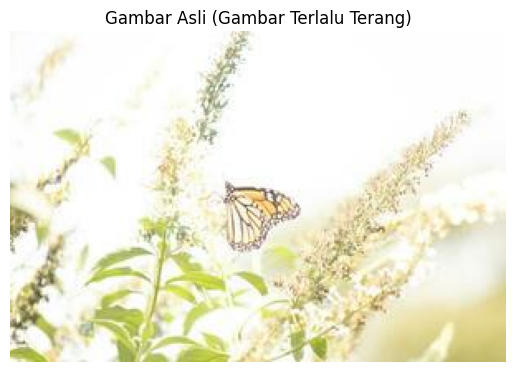

In [2]:
bright_image = cv2.imread('bright_image.jpg')

plt.imshow(cv2.cvtColor(bright_image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli (Gambar Terlalu Terang)')
plt.axis('off')
plt.show()

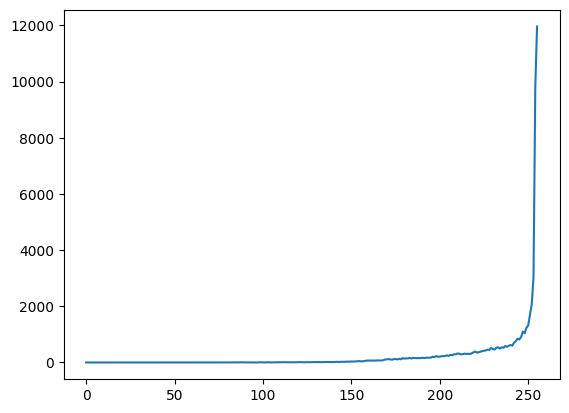

In [18]:
grayscale_image = cv2.cvtColor(bright_image, cv2.COLOR_BGR2GRAY) # gambar diubah menjadi grayscale

histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.savefig('histogram_bright_img.jpg')
plt.show()

Gambar diubah menjadi grayscale untuk memudahkan proses analisis menggunakan histogram. Berdasarkan informasi dari histogram di atas, gambar memiliki tingkat kecerahan yang cukup ekstrem dan salah satu metode yang bisa digunakan untuk menangani kasus ini adalah Gamma Correction.

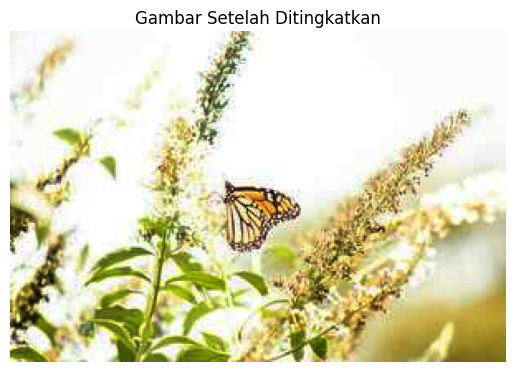

True

In [19]:
r = bright_image.astype(np.float32) / 255.0 # nilai r (intensitas piksel yang asli) diubah dari rentang 0-255 menjadi 0-1

gamma = 2.8 # nilai gamma > 1, gambar lebih gelap
c = 1.0 # konstanta
s = c * np.power(r, gamma)

s = np.clip(s * 255.0, 0, 255).astype(np.uint8) # nilai s (intensitas piksel yang baru) dengan rentang 0-1 dikembalikan ke rentang 0-255

plt.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))
plt.title("Gambar Setelah Ditingkatkan")
plt.axis("off")
plt.show()

cv2.imwrite('enhanced_img.jpg', s)

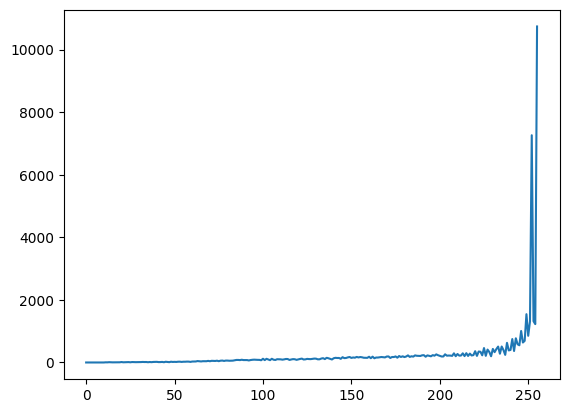

In [20]:
grayscale_image = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY)

histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.savefig('histogram_enhanced_img.jpg')
plt.show()

**2. Menangani Gambar yang Terlalu Gelap**

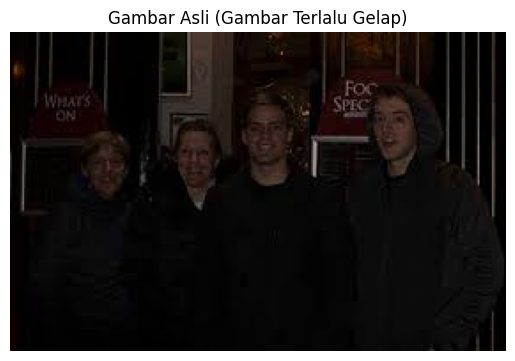

In [6]:
dark_image = cv2.imread('dark_image.jpeg')

plt.imshow(cv2.cvtColor(dark_image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli (Gambar Terlalu Gelap)')
plt.axis('off')
plt.show()

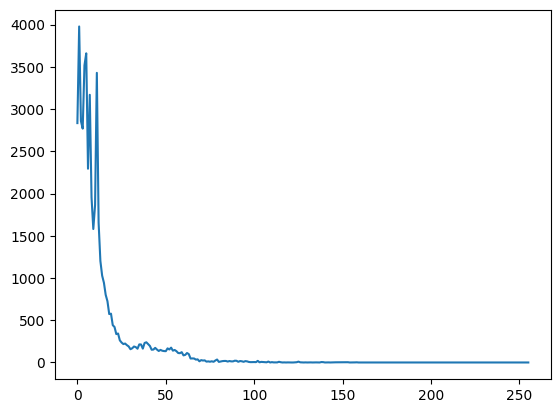

In [21]:
grayscale_image = cv2.cvtColor(dark_image, cv2.COLOR_BGR2GRAY) # gambar diubah menjadi grayscale

histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.savefig('histogram_dark_img.jpg')
plt.show()

Histogram di atas menunjukkan bahwa gambar terlalu gelap dan metode yang bisa digunakan untuk menangani kasus ini sama dengan metode untuk menangani gambar yang terlalu terang, yaitu Gamma Correction.

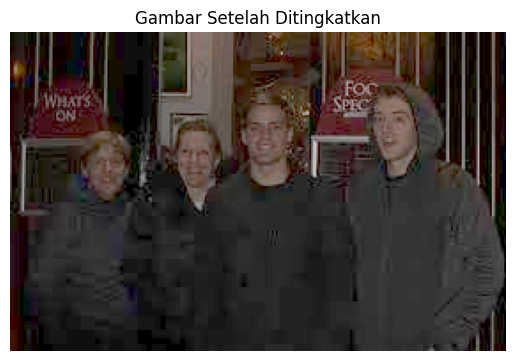

True

In [22]:
r = dark_image.astype(np.float32) / 255.0

gamma = 0.5 # nilai gamma < 1, gambar lebih terang
c = 1.0
s = c * np.power(r, gamma)

s = np.clip(s * 255.0, 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))
plt.title("Gambar Setelah Ditingkatkan")
plt.axis("off")
plt.show()

cv2.imwrite('enhanced_dark_img.jpg', s)

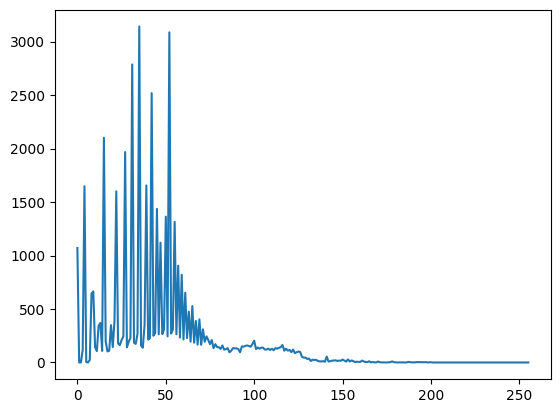

In [23]:
grayscale_image = cv2.cvtColor(s, cv2.COLOR_BGR2GRAY) # gambar diubah menjadi grayscale

histogram = cv2.calcHist([grayscale_image], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.savefig('histogram_enhanced_dark_img.jpg')
plt.show()

**3. Menangani Gambar dengan Kontras Rendah**

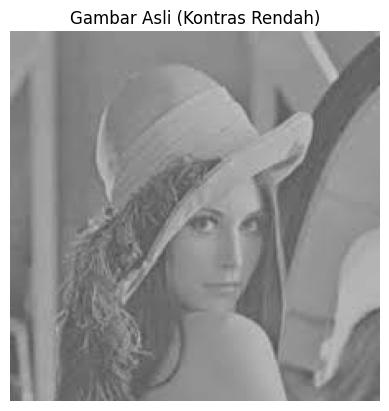

In [10]:
low_contrast_img = cv2.imread('low_contrast_img.jpeg')

plt.imshow(cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli (Kontras Rendah)')
plt.axis('off')
plt.show()

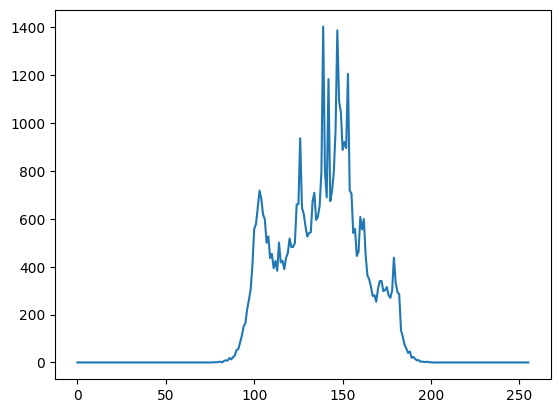

In [24]:
histogram = cv2.calcHist([low_contrast_img], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.savefig('histogram_low_contrast_img.jpg')
plt.show()

Berdasarkan informasi dari histogram di atas, gambar memiliki rentang nilai piksel yang sempit, artinya gambar memiliki kontras yang rendah. Salah satu metode yang dapat digunakan untuk menangani masalah tersebut adalah Contrast Stretching.

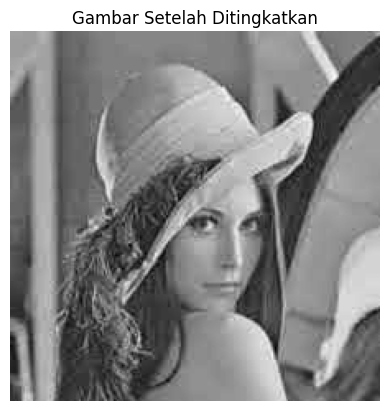

True

In [25]:
a = 0
b = 255.0
max_val = np.max(low_contrast_img)
min_val = np.min(low_contrast_img)

low_contrast_img_stretch = (low_contrast_img - min_val) * (b - a) / (max_val - min_val) + a
low_contrast_img_stretch = low_contrast_img_stretch.astype(np.uint8)

plt.imshow(cv2.cvtColor(low_contrast_img_stretch, cv2.COLOR_BGR2RGB))
plt.title("Gambar Setelah Ditingkatkan")
plt.axis("off")
plt.show()

cv2.imwrite('enhanced_low_contrast_img.jpg', low_contrast_img_stretch)

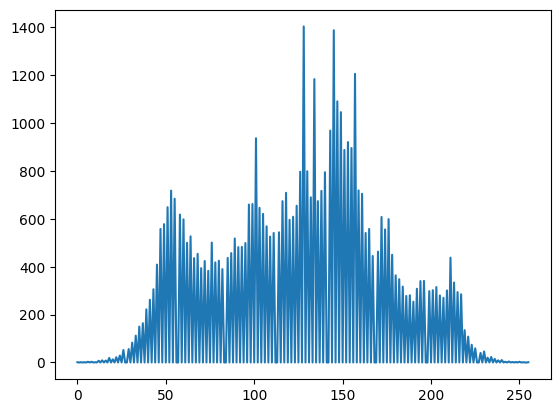

In [26]:
histogram = cv2.calcHist([low_contrast_img_stretch], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.savefig('histogram_enhanced_low_contrast_img.jpg')
plt.show()

**4. Menangani Gambar yang Mengandung Noise/Derau**

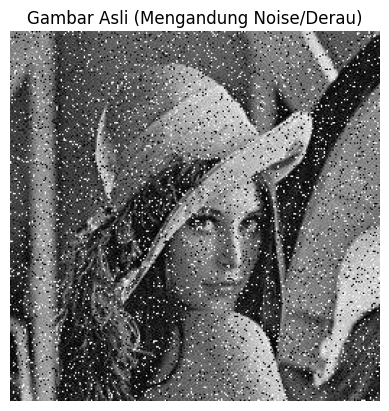

In [14]:
noisy_image = cv2.imread('noisy_img.png')

plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli (Mengandung Noise/Derau)')
plt.axis('off')
plt.show()

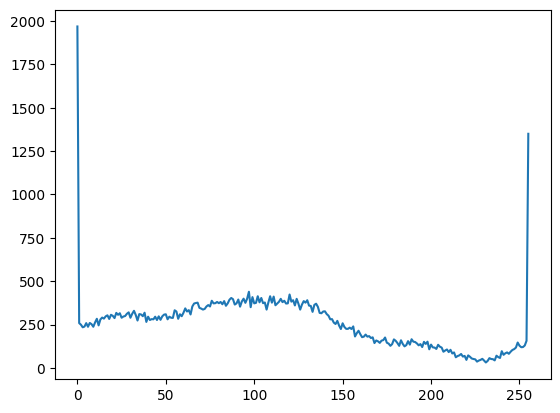

In [27]:
histogram = cv2.calcHist([noisy_image], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.savefig('histogram_noisy_img.jpg')
plt.show()

Analisis visual:
1. Gambar mengandung bintik-bintik hitam dan putih yang tersebar secara acak
2. Pada histogram di atas terlihat bahwa kedua ujung spektrum (pada nilai piksel 0 dan 255) memiliki puncak yang sangat tinggi

Maka, dapat disimpulkan bahwa gambar mengandung noise. Salah satu cara untuk menangani masalah kualitas citra ini adalah dengan menggunakan metode Median Filtering.

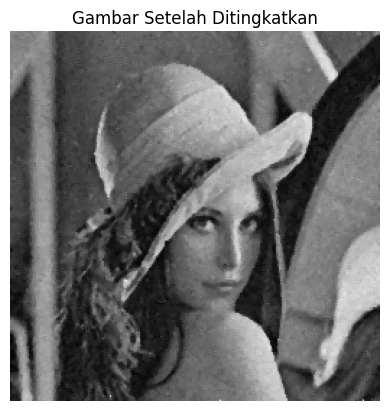

True

In [28]:
kernel_size = 3 # ukuran filter/kernel (matriks 3x3)

noisy_img_enhanced = cv2.medianBlur(noisy_image, kernel_size)

plt.imshow(cv2.cvtColor(noisy_img_enhanced, cv2.COLOR_BGR2RGB))
plt.title("Gambar Setelah Ditingkatkan")
plt.axis("off")
plt.show()

cv2.imwrite('enhanced_noisy_img.jpg', noisy_img_enhanced)

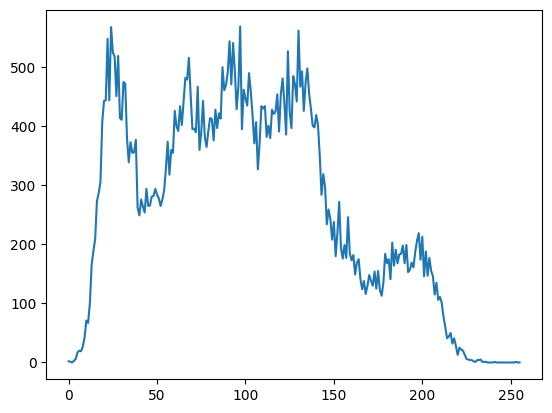

In [29]:
histogram = cv2.calcHist([noisy_img_enhanced], [0], None, [256], [0, 256])
plt.plot(histogram)
plt.savefig('histogram_enhanced_noisy_img.jpg')
plt.show()